In [1]:
import pandas as pd
import numpy as np
import keras
from numpy import array
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import GRU
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import RepeatVector
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from matplotlib import pyplot as plt
from itertools import chain

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/scalation/data/master/COVID/CLEANED_35.csv')
print(df.shape)
deaths = df['deathIncrease'].tail(391-44)
sequence=list(deaths)

(391, 18)


In [3]:
def split_sequence(data,steps_in,steps_out):
    X,y=list(),list()
    for i in range(len(data)):
        seq_end=i+steps_in
        end_out=seq_end+steps_out
        if end_out > len(data):
            break
        seq_x, seq_y=data[i:seq_end], data[seq_end:end_out]
        X.append(seq_x)
        y.append(seq_y)
    return array(X),array(y)

In [4]:
steps_in, steps_out = 21 , 14
X, y=split_sequence(sequence,steps_in,steps_out)

In [5]:
features=1
X=X.reshape(X.shape[0],X.shape[1],features)
print(X.shape, y.shape)

(313, 21, 1) (313, 14)


In [24]:
#Model after tuning
Tuned_model = Sequential()
Tuned_model.add(GRU(96,activation='relu',input_shape=(steps_in,features)))
Tuned_model.add(RepeatVector(steps_out))
Tuned_model.add(GRU(128, activation='relu'))
Tuned_model.add(RepeatVector(steps_out))
Tuned_model.add(GRU(128, activation='relu'))
Tuned_model.add(Dense(steps_out))
Tuned_model.compile(optimizer='adam',loss='mape')
Tuned_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_18 (GRU)                 (None, 96)                28512     
_________________________________________________________________
repeat_vector_11 (RepeatVect (None, 14, 96)            0         
_________________________________________________________________
gru_19 (GRU)                 (None, 128)               86784     
_________________________________________________________________
repeat_vector_12 (RepeatVect (None, 14, 128)           0         
_________________________________________________________________
gru_20 (GRU)                 (None, 128)               99072     
_________________________________________________________________
dense_6 (Dense)              (None, 14)                1806      
Total params: 216,174
Trainable params: 216,174
Non-trainable params: 0
________________________________________________

m = 313, tr_size = 187, te_size = 126, kt = 126, h = 10
(126, 21, 1) (126, 14) (187, 21, 1) (187, 14)
we are in loop


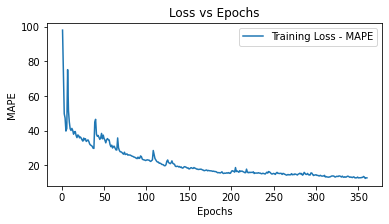

Min Training Loss = 12.485584259033203 at Epoch 358
h=1  ->  smape= 14.26
h=2  ->  smape= 15.00
h=3  ->  smape= 16.68
h=4  ->  smape= 17.00
h=5  ->  smape= 18.03
h=6  ->  smape= 18.42
h=7  ->  smape= 18.88
h=8  ->  smape= 21.13
h=9  ->  smape= 22.29
h=10 ->  smape= 22.97
h=11  ->  smape= 25.59
h=12  ->  smape= 24.90
h=13  ->  smape= 29.15
h=14  ->  smape= 29.97
rSq =['0.8941', '0.8737', '0.8397', '0.8188', '0.8286', '0.8257', '0.8010', '0.7769', '0.7515', '0.7356', '0.6918', '0.7202', '0.6775', '0.6576'] mape =['14.49', '15.81', '17.10', '17.28', '17.76', '18.11', '18.44', '20.34', '21.84', '21.67', '22.79', '21.86', '24.74', '25.34'] smape =['14.26', '15.00', '16.68', '17.00', '18.03', '18.42', '18.88', '21.13', '22.29', '22.97', '25.59', '24.90', '29.15', '29.97'] mse =['134776.82', '158553.03', '205322.21', '239054.02', '231784.10', '238203.98', '272614.72', '301415.12', '330712.23', '354315.25', '419024.75', '401601.06', '466121.96', '493401.22'] rmse =['367.12', '398.19', '453.12'

In [25]:
rSq, mape, smape, mse, rmse, sse, sst, beats, prediction, y_e = rollingValidate(Tuned_model, True, X, y, -1, 10, 0, 360, 16, True, True, True)
print("rSq ="+str(rSq)+ " mape ="+str(mape) +" smape ="+ str(smape)+" mse ="+ str(mse) +" rmse ="+ str(rmse)+" sse ="+ str(sse)+ " sst ="+ str(sst))

In [19]:
#Model before tuning
model = Sequential()
model.add(GRU(100,activation='relu',input_shape=(steps_in,features)))
model.add(RepeatVector(steps_out))
model.add(GRU(100, activation='relu'))
model.add(RepeatVector(steps_out))
model.add(GRU(50, activation='relu'))
model.add(Dense(steps_out))
model.compile(optimizer='adam',loss='mape')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_12 (GRU)                 (None, 21, 100)           30900     
_________________________________________________________________
gru_13 (GRU)                 (None, 100)               60600     
_________________________________________________________________
repeat_vector_8 (RepeatVecto (None, 14, 100)           0         
_________________________________________________________________
gru_14 (GRU)                 (None, 50)                22800     
_________________________________________________________________
dense_4 (Dense)              (None, 14)                714       
Total params: 115,014
Trainable params: 115,014
Non-trainable params: 0
_________________________________________________________________


m = 313, tr_size = 187, te_size = 126, kt = 126, h = 10
(126, 21, 1) (126, 14) (187, 21, 1) (187, 14)
we are in loop


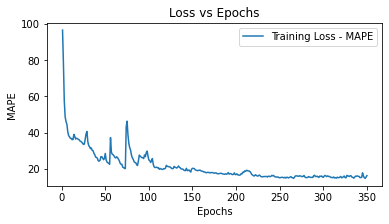

Min Training Loss = 14.694308280944824 at Epoch 266
h=1  ->  smape= 18.00
h=2  ->  smape= 18.82
h=3  ->  smape= 23.12
h=4  ->  smape= 19.66
h=5  ->  smape= 19.18
h=6  ->  smape= 23.03
h=7  ->  smape= 22.08
h=8  ->  smape= 25.51
h=9  ->  smape= 28.85
h=10 ->  smape= 29.44
h=11  ->  smape= 26.79
h=12  ->  smape= 29.32
h=13  ->  smape= 30.23
h=14  ->  smape= 34.65
rSq =['0.8790', '0.8588', '0.8028', '0.8227', '0.8311', '0.8139', '0.8067', '0.7590', '0.6972', '0.6887', '0.6979', '0.7051', '0.6845', '0.6187'] mape =['17.07', '17.87', '21.02', '18.68', '18.51', '20.74', '20.59', '24.05', '26.08', '25.47', '23.53', '25.08', '25.72', '29.25'] smape =['18.00', '18.82', '23.12', '19.66', '19.18', '23.03', '22.08', '25.51', '28.85', '29.44', '26.79', '29.32', '30.23', '34.65'] mse =['153904.99', '177347.24', '252544.92', '233940.01', '228369.43', '254426.09', '264778.18', '325626.85', '402934.92', '417257.11', '410668.27', '423331.61', '456048.20', '549478.21'] rmse =['392.31', '421.13', '502.54'

In [21]:
rSq, mape, smape, mse, rmse, sse, sst, beats, prediction, y_e = rollingValidate(model, True, X, y, -1, 10, 0, 350, 16, True, True, True)
print("rSq ="+str(rSq)+ " mape ="+str(mape) +" smape ="+ str(smape)+" mse ="+ str(mse) +" rmse ="+ str(rmse)+" sse ="+ str(sse)+ " sst ="+ str(sst))

In [7]:
def train50(X,y):
    TR_RATIO = 0.5
    m = y.shape[0]
    tr_size = int(m * TR_RATIO)
    te_size = int(m - tr_size)
    te = int(tr_size)
   # if kt < 0: kt = te_size
    #print("m = "+str(m)+", tr_size = "+str(tr_size)+", te_size = "+str(te_size))
    
    (x_e, y_e, x_r, y_r) = chopr (X, y, te, te_size, tr_size)
    return x_e, y_e, x_r, y_r

In [8]:
def plotHistory(fit_history,ls="MAPE"):
    #Get training loss
    loss = fit_history.history['loss']
    # val_loss = fit_history.history['val_loss']

    # Create count of the number of epochs
    epoch_count = range(1, len(loss) + 1)

#     # Visualize loss history - Plotting Loss vs Number of Epochs during training
    plt.figure(num=0,figsize=(6,3))
    plt.plot(epoch_count, loss)
    # plt.plot(val_loss)
    plt.legend(['Training Loss - '+str(ls), 'Validation Loss - '+str(ls)])
    plt.xlabel('Epochs')
    plt.ylabel(ls)
    plt.title("Loss vs Epochs")
    plt.show()

#     print("_________________________________________________________________________________________")
    print("Min Training Loss = " + str(np.min(loss)) + " ",end='')
    print("at Epoch " + str(np.argmin(loss) + 1))
    # print("Min Validation Loss = " + str(np.min(val_loss)) + " ",end='')
    # print("at Epoch " + str(np.argmin(val_loss) + 1))
#     print("__________________________________________________________________________________________")

In [9]:
def eval(y,yp):
    # print(y)
    # print(yp)
    import math
    roundTo = 5
    m = y.shape[0]
    # print(m)
    e = np.array(y - yp)

    # print("m")
    # print(e)
    yt = np.array(y - y.mean())
    sse = e.dot(e)
    sst = yt.dot(yt)
    rSq = round((1 - ((sse)/(sst))),roundTo)
    mape = round(((np.absolute(e)/np.absolute(y)).sum())*100/m,roundTo)
    t = (np.absolute(e)/(np.absolute(y)+np.absolute(yp)))
    #print(t.sum()*200/m)
    smape = round(((np.absolute(e)/(np.absolute(y)+np.absolute(yp))).sum())*200/m,roundTo)
    # smape  = 200 * (e.abs / (yy.abs + yp.abs)).sum / m
    mse = round((sse/m),roundTo)
    rmse = round(math.sqrt(mse),roundTo)
#     return(rSq,mape,mse,rmse,sse,sst)
    return(format(rSq,'.4f'),format(mape,'.2f'),format(smape,'.2f'),format(mse,'.2f'),format(rmse,'.2f'),format(sse,'.2f'),format(sst,'.2f'))

In [10]:
def rollingValidate(model, train, x, y, kt, h, callbk, nEpoch, nBatch, plot, p1, p2):
    TR_RATIO = 0.6
    m = y.shape[0]
    tr_size = int(m * TR_RATIO)
    te_size = int(m - tr_size)
    te = int(tr_size)
    if kt < 0: kt = te_size
    print("m = "+str(m)+", tr_size = "+str(tr_size)+", te_size = "+str(te_size)+", kt = "+str(kt)+", h = "+str(h))
    
    (x_e, y_e, x_r, y_r) = chopr (x, y, te, te_size, tr_size)
    print(x_e.shape, y_e.shape, x_r.shape, y_r.shape)
    # print(type(y_r))
    # print(y_r.index)
    
    # print(type(y_e))
    # print(y_e.index)
    #print(y_e.shape)
    #y_e = np.array(y_e)
    #print(y_e)
   # smapearr = [x for x in range(10,24)]
   # for h in range(1,15):
   #     yr =  y_r[h-1]
   #     inp = y_e[h-1].tolist()
   #     yrw = inp[:-h]
       
   #     for i in range(h):
   #         yrw.insert(i,inp[i])
   #     yrw = np.array(yrw)
   #     rSqr, maper, smaper, mser, rmser, sser, sstr = eval(y_e[h-1],yrw)
   #     smapearr[h-1] = smaper
#     x_r = x_r[1000:]
#     y_r = y_r[1000:]
#     print("Training shape"+str(x_r.shape))
#     print("Training shape"+str(y_r.shape))
#     print("Testing shape"+str(x_e.shape))
#     print("Testing shape"+str(y_e.shape))
    rt = 0
#     print("number of re-trainings required = "+str(int((te_size/kt)+1)))
    for i in range(y_e.shape[0]):
        if i%kt == 0:
            rt = rt + 1
            if i > 0:
                x_r, y_r = shift_rm((x_r,y_r),((x_e.iloc[i-kt:i], y_e.iloc[i-kt:i])))
            if train:
                if callbk==1:
                    callb = callbacks.EarlyStopping(monitor='loss', restore_best_weights=True, patience=20,verbose=1)
                else: callb = None
                print("we are in loop")
                fit_history = model.fit(x_r, y_r,validation_split=0.10,shuffle=True,epochs=nEpoch, \
                                        batch_size=nBatch,verbose=0, callbacks=callb) #callbacks=[tfa.callbacks.TQDMProgressBar(leave_epoch_progress=False,show_epoch_progress=False)]  workers=10, use_multiprocessing=True,
            if plot: plotHistory(fit_history)
#     print("\nOut-Sample Results")
#    rw = np.array([2.47,3.79,4.6,5.23,5.75,6.18,6.61,6.94,7.29,7.70]) #RW results - mape for 50% TR
#    rw = np.array([float(x) for x in smapearr]) #calculated using python
    beats = []
    
    prediction = model.predict(x_e,batch_size=100)
    rSq  = [x for x in range(14)]
    mse  = [x for x in range(14)]
    sse  = [x for x in range(14)]
    sst  = [x for x in range(14)]
    rmse = [x for x in range(14)]
    mape = [x for x in range(14)]
    smape = [x for x in range(14)]
    maxdif = 0
    maxdifh = 0

    for h in range(1,15):
        yf = prediction[:,h-1]
        rSq[h-1], mape[h-1], smape[h-1], mse[h-1], rmse[h-1], sse[h-1], sst[h-1] = eval(y_e[:,h-1],yf)
       # diff = (rw[h-1] - float(mape[h-1]))
        #if rw[h-1] >= float(mape[h-1]): beats.append(h)
        #if diff > maxdif:
        #    maxdif = diff
        #    maxdifh = h
        if p1:
            if h != 10:print("h="+str(h)+"  -> "+" smape= "+str(smape[h-1]))     #" sse = "+str(sse[h-1]) +
            else:print("h="+str(h)+" -> "+" smape= "+str(smape[h-1]))            #" sse = "+str(sse[h-1]) +
#             if h != 10: print("h="+str(h)+"  -> "+"rsq = "+str(rSq[h-1])+" mape = "+str(mape[h-1])+","+str(format(rw[h-1],'.2f'))+" mse = "+str(mse[h-1])+" rmse = "+str(rmse[h-1]) +" sst = "+str(sst[h-1])) #" sse = "+str(sse[h-1]) +
#             else: print("h="+str(h)+" -> "+"rsq = "+str(rSq[h-1])+" mape = "+str(mape[h-1])+","+str(format(rw[h-1],'.2f'))+" mse = "+str(mse[h-1])+" rmse = "+str(rmse[h-1]) +" sst = "+str(sst[h-1])) #" sse = "+str(sse[h-1]) +
#         print("h="+str(h)+" -> "+" mape = "+str(mape)+","+str(rw[h-1])+" rsq = "+str(rSq))
    #if p2: 
        #print("Beats RW at "+str(len(beats))+" values of h="+str(beats))
        #print("Max difference = "+str(maxdif)+" at horizon h="+str(maxdifh))
    return (rSq, mape, smape, mse, rmse, sse, sst, beats, prediction, y_e)

In [11]:
def chopr(x,y,te,te_size,tr_size):
    te2 = te + te_size
    tr = te - tr_size
#     print("te="+str(te))
#     print("te_size="+str(te_size))
#     print("tr_size="+str(tr_size))
    x_e = x[te:te2]
    y_e = y[te:te2]
    x_r = x[tr:te]
    y_r = y[tr:te]
    
#     print("test: x_e("+str(te)+" .. "+str(te2-1)+")")
#     print("test: y_e("+str(te)+" .. "+str(te2-1)+")")
#     print("train: x_r("+str(tr)+" .. "+str(te-1)+")")
#     print("train: y_r("+str(tr)+" .. "+str(te-1)+")")
    return(x_e, y_e, x_r, y_r)

In [63]:
xa,ya,xb,yb=train50(X,y)
print(xa.shape,ya.shape, xb.shape, yb.shape)
model.fit(xb,yb, epochs=500, batch_size=20,verbose=0)
data=xa[1]
pa=model.predict(data.reshape(1,7,1))
pb=model.predict(pa.reshape(1,7,1))
yc=np.append(ya[1],ya[2])
#yc=list(chain(*yc))
yc=yc.reshape(1,14)
yd=np.append(pa,pb)
#yd=list(chain(*yd))
yd=yd.reshape(1,14)
for h in range(1,15):
    rSq, mape, smape, mse, rmse, sse, sst = eval(yc[:,h-1],yd[:,h-1])
    print(yc[:,h-1], yd[:,h-1])
    print(("h="+str(h)+"  -> "+"rsq = "+str(rSq)+" mape = "+str(mape)+" smape = "+str(smape)+" mse = "+str(mse)+" rmse = "+str(rmse) +" sse = "+str(sse) +" sst = "+str(sst),"h="+str(h)+" -> "+"rsq = "+str(rSq)+" mape = "+str(mape)+" smape = "+str(smape)+" mse = "+str(mse)+" rmse = "+str(rmse) +" sse = "+str(sse) +" sst = "+str(sst))[h >= 10])



[1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 4, 3, 2, 1, 4, 3, 2, 1, 4, 3, 2, 1]
